In [26]:
# Import Python modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Machine learning modules

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [28]:
# Read clinical trials data 
file_path = 'C:./data/vaccine_trials.csv'
vaccine_trials = pd.read_csv(file_path, index_col = 0)

# Filter completed studies
trials_filtered = vaccine_trials[vaccine_trials['OverallStatus'] == 'Completed']
trials_filtered

# Drop 'Rank' column
trials_filtered.drop('Rank', axis=1, inplace=True)

# Display the DataFrame
trials_filtered

c:\Users\Bruna Los\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,NCTId,Phase,Condition,EnrollmentCount,OverallStatus
0,NCT00478816,Phase 2,Prophylaxis of Avian Influenza Vaccine,58,Completed
2,NCT03771157,Early Phase 1,Chronic Lymphocytic Leukemia (CLL)|Waldenstrom...,33,Completed
3,NCT03057483,NaN,Influenza Vaccines,533,Completed
4,NCT00735410,Phase 3,"Seasonal Influenza, Vaccine",134,Completed
5,NCT00103116,Phase 2,Lung Cancer,32,Completed
...,...,...,...,...,...
994,NCT00430521,Phase 2,Influenza|Influenza Vaccines,512,Completed
995,NCT01062477,Phase 3,Diphtheria|Tetanus|Pertussis|Haemophilus Influ...,1056,Completed
996,NCT02236052,Phase 2,Virus Diseases|RNA Virus Infections|Respirator...,450,Completed
997,NCT03357276,Phase 1|Phase 2,Metastatic Colorectal Cancer|Reaction - Mixed ...,30,Completed



### Retrieve data from AACT

1. Use this link: [AACT Download](https://aact.ctti-clinicaltrials.org/download)
2. Select pipe-delimited files.
3. Download the latest version of the "Current Month's Daily Static Copies."

- You can find information about each table in the AACT dataset [here](https://aact.ctti-clinicaltrials.org/data_dictionary).



#### drop_withdrawals.txt

- Summarized information about how many participants withdrew from the study, when and why. This information explains disposition of participants relative to the numbers starting and completing the study (enumerated in the Milestones table)

In [29]:
# Read drop_withdrawals file from AACT database
file_path = 'C:./data/drop_withdrawal.txt'

# select only the id, nct_id, period, reason, and count columns
drop_withdrawals = pd.read_csv(file_path, header=0, sep="|", usecols=[0,1,4,5,6])

# Rename nct_id column to NCTId 
drop_withdrawals = drop_withdrawals.rename(columns={"nct_id": "NCTId"})

# Display the DataFrame
drop_withdrawals

,id,NCTId,period,reason,count
0,41463481,NCT01443026,Overall Study,Physician Decision,1.0
1,41463482,NCT01443026,Overall Study,Physician Decision,0.0
2,41463483,NCT01443026,Overall Study,Death,0.0
3,41463484,NCT01443026,Overall Study,Death,1.0
4,41463485,NCT01443026,Overall Study,Withdrawal by Subject,0.0
...,...,...,...,...,...
463552,41835055,NCT02333331,Overall Study,Protocol Deviation,1.0
463553,41835056,NCT02333331,Overall Study,Patient/Guardian Decision,1.0
463554,41835057,NCT02333331,Overall Study,Patient/Guardian Decision,2.0
463555,41835058,NCT02333331,Overall Study,Patient/Guardian Decision,9.0


#### milestones.txt

- Information summarizing the progress of participants through each stage of a study, including the number of participants who started and completed the trial. Enumeration of participants not completing the study is included in the Drop_Withdrawals table.

In [51]:
# Read milestones file from AACT database
file_path = 'C:./data/milestones.txt'

# select only the id, nct_id, period, reason, and count columns
milestones = pd.read_csv(file_path, header=0, sep="|", usecols=[0,1,4,5,7])

# Rename nct_id column to NCTId 
milestones = milestones.rename(columns={"nct_id": "NCTId"})

# Display the DataFrame
milestones

,id,NCTId,title,period,count
0,59334265,NCT02829723,STARTED,Overall Study,5.0
1,59334266,NCT02829723,STARTED,Overall Study,7.0
2,58934891,NCT03907579,STARTED,Overall Study,100.0
3,59201010,NCT03074500,STARTED,Overall Study,11.0
4,59201011,NCT03074500,STARTED,Overall Study,11.0
...,...,...,...,...,...
664874,59334260,NCT03091192,NOT COMPLETED,Overall Study,33.0
664875,59334261,NCT03091192,NOT COMPLETED,Overall Study,27.0
664876,59334262,NCT03087760,STARTED,Overall Study,22.0
664877,59334263,NCT03087760,COMPLETED,Overall Study,3.0


#### Exploring the data

In [30]:
# Merge the vaccine clinical trials file with the drop withdrawals file on the NCT Id
trials_drop = pd.merge(drop_withdrawals, trials_filtered, on='NCTId')
trials_drop

,id,NCTId,period,reason,count,Phase,Condition,EnrollmentCount,OverallStatus
0,41557479,NCT00992836,Overall Study,Lost to Follow-up,1.0,Phase 2,HIV Infections|H1N1 Influenza Virus,155,Completed
1,41557480,NCT00992836,Overall Study,Withdrawal by Subject,2.0,Phase 2,HIV Infections|H1N1 Influenza Virus,155,Completed
2,41557481,NCT00992836,Overall Study,Protocol Violation,2.0,Phase 2,HIV Infections|H1N1 Influenza Virus,155,Completed
3,41559459,NCT00938392,Overall Study,Adverse Event,0.0,Phase 3,Influenza,726,Completed
4,41559460,NCT00938392,Overall Study,Adverse Event,1.0,Phase 3,Influenza,726,Completed
...,...,...,...,...,...,...,...,...,...
2804,41463026,NCT01666782,Overall Study,Enrolled both years; year 1 data used,0.0,Phase 2,Cancer|Influenza Viral Infections,105,Completed
2805,41553941,NCT01258595,Overall Study,Lost to Follow-up,1.0,Phase 2,Influenza,300,Completed
2806,41553942,NCT01258595,Overall Study,Lost to Follow-up,0.0,Phase 2,Influenza,300,Completed
2807,41553943,NCT01258595,Overall Study,Withdrawal by Subject,0.0,Phase 2,Influenza,300,Completed


In [31]:
# Print information about the DataFrame
trials_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2809 entries, 0 to 2808
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2809 non-null   int64  
 1   NCTId            2809 non-null   object 
 2   period           2809 non-null   object 
 3   reason           2809 non-null   object 
 4   count            2809 non-null   float64
 5   Phase            2800 non-null   object 
 6   Condition        2809 non-null   object 
 7   EnrollmentCount  2809 non-null   int64  
 8   OverallStatus    2809 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 219.5+ KB


In [32]:
# Count unique events per column
unique_counts = trials_drop.nunique()
unique_counts

id                 2809
NCTId               218
period               26
reason              156
count               106
Phase                 7
Condition           123
EnrollmentCount     196
OverallStatus         1
dtype: int64

In [33]:
# Check for duplicates
duplicates = trials_drop.duplicated()
print(duplicates.value_counts())

False    2809
dtype: int64


In [34]:
# Count NaN values per column
nan_counts = trials_drop.isna().sum()
nan_counts

id                 0
NCTId              0
period             0
reason             0
count              0
Phase              9
Condition          0
EnrollmentCount    0
OverallStatus      0
dtype: int64

In [35]:
# Summary statistics

#trials_drop.describe(include = 'all')
trials_drop.describe()

,id,count,EnrollmentCount
count,2.809000e+03,2809.000000,2809.000000
mean,4.166494e+07,10.702029,2368.951228
std,1.239859e+05,107.464779,6864.402191
min,4.146058e+07,0.000000,1.000000
25%,4.156007e+07,0.000000,449.000000
50%,4.165647e+07,1.000000,777.000000
75%,4.173069e+07,3.000000,1893.000000
max,4.192300e+07,3006.000000,84496.000000


In [36]:
# Group by 'NCTId' and count occurrences of each 'reason'
reason_counts = trials_drop.groupby(['NCTId', 'reason']).size().reset_index(name='count')
reason_counts

,NCTId,reason,count
0,NCT00101166,progressive disease,1
1,NCT00130793,Lost to Follow-up,2
2,NCT00130793,Withdrew consent,2
3,NCT00244374,Declined to participate in cohort,5
4,NCT00244374,Did not complete baseline procedures,5
...,...,...,...
783,NCT05091307,Other,4
784,NCT05091307,Physician Decision,4
785,NCT05091307,Protocol Violation,4
786,NCT05091307,Randomized but not vaccinated,4


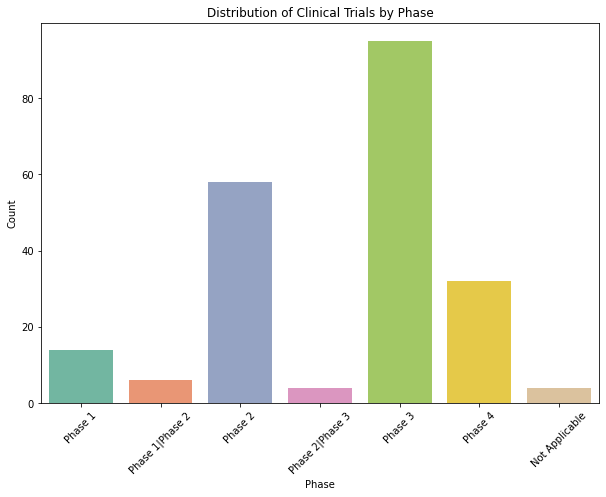

In [37]:
# Plot the distribution of clinical trials by phase

# Select only 'NCTId' and 'Phase' columns
phase_df = trials_drop[['NCTId', 'Phase']]
phase_df = phase_df.drop_duplicates()


# Define the order for phases
phase_order = ['Phase 1', 'Phase 1|Phase 2','Phase 2', 'Phase 2|Phase 3', 'Phase 3', 'Phase 4', 'Not Applicable']


# Set the figure size
plt.figure(figsize=(10, 7))

# Plot a countplot
sns.countplot(x='Phase', data=phase_df, palette='Set2', order=phase_order)
plt.title('Distribution of Clinical Trials by Phase')
plt.xlabel('Phase')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [62]:
# Merge the vaccine clinical trials file with the milestones file on the NCT Id
trials_participants_status = pd.merge(trials_filtered, milestones, on='NCTId')
trials_participants_status

,NCTId,Phase,Condition,EnrollmentCount,OverallStatus,id,title,period,count
0,NCT03771157,Early Phase 1,Chronic Lymphocytic Leukemia (CLL)|Waldenstrom...,33,Completed,59224103,STARTED,Overall Study,32.0
1,NCT03771157,Early Phase 1,Chronic Lymphocytic Leukemia (CLL)|Waldenstrom...,33,Completed,59224104,COMPLETED,Overall Study,31.0
2,NCT03771157,Early Phase 1,Chronic Lymphocytic Leukemia (CLL)|Waldenstrom...,33,Completed,59224105,NOT COMPLETED,Overall Study,1.0
3,NCT00103116,Phase 2,Lung Cancer,32,Completed,58955224,STARTED,Overall Study,32.0
4,NCT00103116,Phase 2,Lung Cancer,32,Completed,58955225,COMPLETED,Overall Study,32.0
...,...,...,...,...,...,...,...,...,...
2965,NCT00309166,Phase 2,"Infections, Papillomavirus",270,Completed,59154345,STARTED,Overall Study,89.0
2966,NCT00309166,Phase 2,"Infections, Papillomavirus",270,Completed,59154346,COMPLETED,Overall Study,176.0
2967,NCT00309166,Phase 2,"Infections, Papillomavirus",270,Completed,59154347,COMPLETED,Overall Study,86.0
2968,NCT00309166,Phase 2,"Infections, Papillomavirus",270,Completed,59154348,NOT COMPLETED,Overall Study,5.0


In [81]:
# Count unique events per column
unique_counts = trials_participants_status.nunique()
unique_counts

NCTId               287
Phase                 8
Condition           158
EnrollmentCount     230
OverallStatus         1
id                 2970
title                52
period               35
count               659
dtype: int64

In [82]:
# Check for duplicates
duplicates = trials_participants_status.duplicated()
print(duplicates.value_counts())

False    2970
dtype: int64


In [83]:
# Count NaN values per column
nan_counts =trials_participants_status.isna().sum()
nan_counts

NCTId               0
Phase              45
Condition           0
EnrollmentCount     0
OverallStatus       0
id                  0
title               0
period              0
count               0
dtype: int64

#### Analysis

In [72]:
# define function to plot top 10

def plot_top_10(dataframe, x_column, y_column, title, xlabel, ylabel):
    # Select the top 10 rows
    top_10 = dataframe.head(10)[::-1]
    
    # Create a bar chart for the top 10, sorted in descending order
    plt.figure(figsize=(12, 6))
    plt.barh(top_10[x_column], top_10[y_column], color='darkviolet')
    
    # Customize the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Show the plot
    plt.show()

- Identify the most frequently reported reasons for patients discontinuing their participation in clinical trials related to vaccine interventions.

In [38]:
# Select only 'id' and 'reason' columns
reason_df = trials_drop[['id', 'reason']]
reason_df = reason_df.drop_duplicates()
reason_df

,id,reason
0,41557479,Lost to Follow-up
1,41557480,Withdrawal by Subject
2,41557481,Protocol Violation
3,41559459,Adverse Event
4,41559460,Adverse Event
...,...,...
2804,41463026,Enrolled both years; year 1 data used
2805,41553941,Lost to Follow-up
2806,41553942,Lost to Follow-up
2807,41553943,Withdrawal by Subject


In [39]:
# Calculate the total count for each condition
reason_counts = reason_df['reason'].value_counts().reset_index()

# Rename the columns for clarity
reason_counts.columns = ['Reason', 'TotalCount']

# Display the resulting DataFrame
reason_counts.head()

,Reason,TotalCount
0,Lost to Follow-up,548
1,Withdrawal by Subject,531
2,Protocol Violation,347
3,Adverse Event,248
4,Death,123


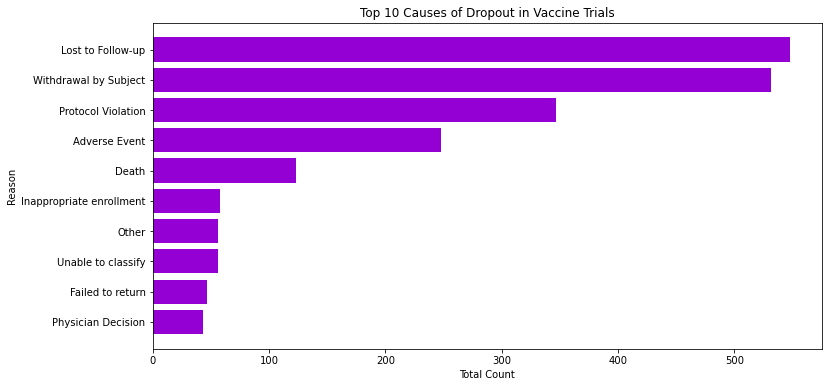

In [74]:
# Plot

dataframe = reason_counts
x_column = 'Reason'
y_column = 'TotalCount'
title = 'Top 10 Causes of Dropout in Vaccine Trials'
xlabel = 'Total Count'
ylabel = 'Reason'


plot_top_10(dataframe, x_column, y_column, title, xlabel, ylabel)


- Determine the prevalence of vaccines utilized as interventions in clinical trials by identifying the most frequently administered ones.

In [41]:
# Select only 'NCTId' and 'Condition' columns
condition_df = trials_drop[['NCTId', 'Condition']]
condition_df = condition_df.drop_duplicates()
condition_df

,NCTId,Condition
0,NCT00992836,HIV Infections|H1N1 Influenza Virus
3,NCT00938392,Influenza
9,NCT01162122,Influenza
27,NCT01027845,"Infections, Streptococcal"
51,NCT02286895,Diarrhea Rotavirus
...,...,...
2749,NCT01214850,N. Meningitidis Carriage
2770,NCT01209780,Seasonal Influenza
2795,NCT01359449,Meningitis|Meningococcal Infection
2801,NCT01666782,Cancer|Influenza Viral Infections


In [42]:
# Calculate the total count for each condition
condition_counts = condition_df['Condition'].value_counts().reset_index()

# Rename the columns for clarity
condition_counts.columns = ['Condition', 'TotalCount']

# Display the resulting DataFrame
condition_counts.head()

,Condition,TotalCount
0,Influenza,36
1,Meningococcal Disease,9
2,"Vaccines, Pneumococcal",8
3,Meningitis|Meningococcal Meningitis|Meningococ...,7
4,"Infections, Streptococcal",6


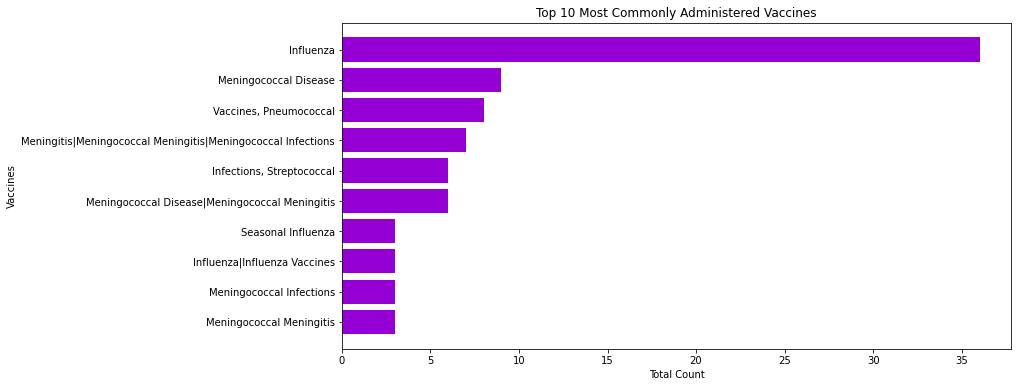

In [79]:
# Plot

dataframe = condition_counts
x_column = 'Condition'
y_column = 'TotalCount'
title = 'Top 10 Most Commonly Administered Vaccines'
xlabel = 'Total Count'
ylabel = 'Vaccines'

plot_top_10(dataframe, x_column, y_column, title, xlabel, ylabel)

- Summary of participants' progress in the study, including the count of those who started and completed the trial.

In [80]:
# Select only 'id' and 'title' columns
status_df = trials_participants_status[['id', 'title']]
status_df = status_df.drop_duplicates()
status_df.head()

,id,title
0,59224103,STARTED
1,59224104,COMPLETED
2,59224105,NOT COMPLETED
3,58955224,STARTED
4,58955225,COMPLETED


In [66]:
# Calculate the total count for each status
status_counts = status_df['title'].value_counts().reset_index()

# Rename the columns for clarity
status_counts.columns = ['Title', 'TotalCount']

# Display the resulting DataFrame
status_counts.head()

,Title,TotalCount
0,STARTED,895
1,NOT COMPLETED,895
2,COMPLETED,895
3,Vaccinated,30
4,Safety Analysis Set (SafAS),27


### Preprocess the data

In [44]:
# Missing values

trials_drop.isnull().sum()

id                 0
NCTId              0
period             0
reason             0
count              0
Phase              9
Condition          0
EnrollmentCount    0
OverallStatus      0
dtype: int64

In [45]:
# Select the variables for further analysis

cols = ['id', 'NCTId', 'reason', 'Condition']
df = trials_drop[cols].dropna()
df.shape 

(2809, 4)

In [46]:
df.head()

,id,NCTId,reason,Condition
0,41557479,NCT00992836,Lost to Follow-up,HIV Infections|H1N1 Influenza Virus
1,41557480,NCT00992836,Withdrawal by Subject,HIV Infections|H1N1 Influenza Virus
2,41557481,NCT00992836,Protocol Violation,HIV Infections|H1N1 Influenza Virus
3,41559459,NCT00938392,Adverse Event,Influenza
4,41559460,NCT00938392,Adverse Event,Influenza


In [47]:
# dummy variables
df = pd.get_dummies(df, columns=['reason', 'Condition'], prefix=['reason', 'Condition'])
df.head()

,id,NCTId,reason_ADMINISTRATIVE REASON,reason_AE or Death,reason_Administrative Reason,reason_Administrative Reasons,reason_Administrative reason,reason_Adverse Event,"reason_Adverse Event, non-fatal","reason_Adverse Event, not serious",...,Condition_Streptococcal Infections|Gram-Positive Bacterial Infections|Bacterial Infections,Condition_Streptococcal Infection|Gram-positive Bacterial Infection|Bacterial Infection,Condition_Tetanus|Diphtheria|Pertussis|Whooping Cough,Condition_Tularemia,Condition_Vaccine Response Impaired,"Condition_Vaccines, Pneumococcal","Condition_Vaccines, Pneumococcal Conjugate Vaccine",Condition_Virus Diseases|RNA Virus Infections|Respiratory Tract Diseases|Respiratory Tract Infections,Condition_Virus Diseases|RNA Virus Infections|Respiratory Tract Diseases|Respiratory Tract Infections|Influenza,Condition_West Nile Fever
0,41557479,NCT00992836,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41557480,NCT00992836,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,41557481,NCT00992836,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,41559459,NCT00938392,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41559460,NCT00938392,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
